In [1]:
from atrader import ETHTrader
import pandas as pd
import polars as pl
import loadData as load


               open     high      low    close       volume  log_returns  \
timestamp                                                                  
2023-04-11  1910.21  1937.37  1881.11  1889.86  405203.4892          NaN   
2023-04-12  1889.86  1933.00  1852.65  1917.39  630844.4186     0.014462   
2023-04-13  1917.40  2023.00  1899.55  2012.01  676164.5188     0.048169   
2023-04-14  2012.00  2128.76  2009.22  2099.99  896307.3934     0.042798   
2023-04-15  2099.99  2111.85  2071.13  2090.60  321823.7851    -0.004481   
...             ...      ...      ...      ...          ...          ...   
2024-08-18  2614.51  2689.16  2594.53  2612.15  174074.0585    -0.000903   
2024-08-19  2612.15  2648.08  2563.58  2636.36  224867.1336     0.009226   
2024-08-20  2636.36  2695.00  2555.00  2572.82  281315.8751    -0.024397   
2024-08-21  2572.81  2663.74  2536.22  2630.71  245286.6218     0.022251   
2024-08-22  2630.71  2644.69  2584.20  2611.98  128642.5947    -0.007145   

           

In [ ]:
trader = ETHTrader()
scaled_features, df = trader.preprocess_data()
trader.train_model(scaled_features)
trader.print_model_parameters()

Training
Finished training
predicting
Backtesting Results:


c:\Users\devpa\anaconda3\envs\atrader\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


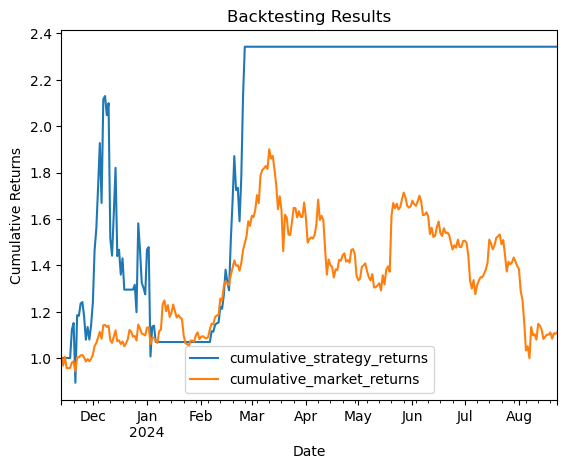

In [10]:
from atrader import ETHTrader
trader = ETHTrader(limit=1000000, n_states=3)
df, predicted_states = trader.backtest()

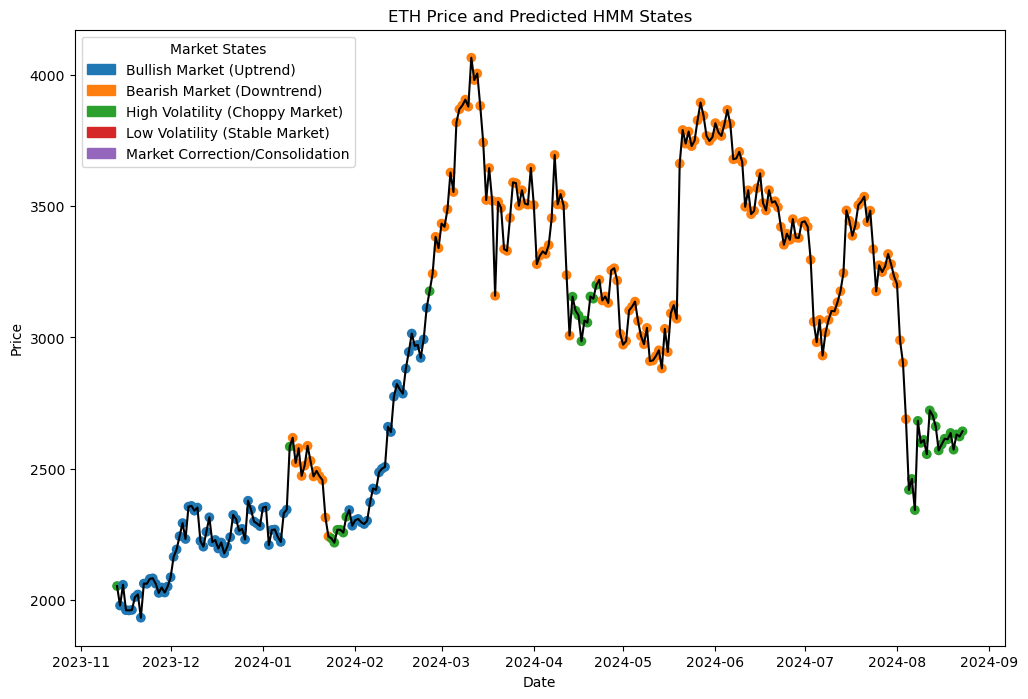

In [11]:


#trader = ETHTrader(limit=10000, n_states=5)
#scaled_features, df = trader.preprocess_data()
#trader.train_model(scaled_features)
df['predicted_state'] = predicted_states

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define your state labels
state_labels = [
    "Bullish Market (Uptrend)", 
    "Bearish Market (Downtrend)", 
    "High Volatility (Choppy Market)", 
    "Low Volatility (Stable Market)", 
    "Market Correction/Consolidation"
]

# Define the colors you want to assign to each state
state_colors = {
    0: '#1f77b4',  # Blue for Bullish Market
    1: '#ff7f0e',  # Orange for Bearish Market
    2: '#2ca02c',  # Green for High Volatility
    3: '#d62728',  # Red for Low Volatility
    4: '#9467bd'   # Purple for Market Correction/Consolidation
}

# Apply the color mapping to your predicted states
colors = np.array([state_colors[state] for state in df['predicted_state']])

# Plot the price with the predicted states
plt.figure(figsize=(12, 8))
plt.plot(df['close'], label='ETH/USDT Price', color='black')  # ETH price in black for contrast

# Scatter plot with the specific colors for each state
plt.scatter(df.index, df['close'], c=colors)

# Create custom legend handles
handles = [mpatches.Patch(color=color, label=label) for label, color in zip(state_labels, state_colors.values())]

# Add the legend
plt.legend(handles=handles, title="Market States", loc='upper left')

# Additional plot details
plt.title('ETH Price and Predicted HMM States')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [3]:
state_analysis = df.groupby('predicted_state').agg({
    'close': ['mean', 'std'],
    'log_returns': ['mean', 'std'],
    'volume': ['mean', 'std'],
    'atr': ['mean', 'std'],
    'rsi': ['mean', 'std'],
    'macd': ['mean', 'std'],
    'macd_signal': ['mean', 'std']
})

print(state_analysis)

                       close             log_returns                  volume  \
                        mean         std        mean       std          mean   
predicted_state                                                                
0                1590.447093  396.310355   -0.006948  0.057773  1.005052e+06   
1                1738.202484  291.586987    0.002186  0.024960  3.893234e+05   
2                3275.847407  428.320728    0.008572  0.035002  4.680097e+05   
3                2814.695778  420.116595   -0.013361  0.033488  4.376711e+05   
4                3070.489157  344.444554   -0.002260  0.032022  3.694095e+05   

                                       atr                   rsi             \
                           std        mean        std       mean        std   
predicted_state                                                               
0                547276.338814  132.381641  36.912116  41.915506  12.610924   
1                214828.200111   65.424702 

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(df['close'], label='ETH/USDT Price')
plt.scatter(df.index, df['close'], c=df['predicted_state'], cmap='viridis', label='Predicted States')
plt.title('ETH Price and Predicted HMM States')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x800 with 0 Axes>

In [39]:
# Main execution
exchange_id = 'binance'  # You can change this to any exchange supported by CCXT
symbol = 'ETH/USDT'
timeframe = '1d'  # Daily timeframe
limit = 500  # Number of candlesticks to fetch

# Fetch data
df = load.fetch_ohlcv_data(exchange_id, symbol, timeframe, limit)

# Calculate indicators
df = load.calculate_log_returns(df)
df = load.calculate_volatility(df)
df = load.calculate_moving_averages(df)


In [5]:
trader = ETHTrader.ETHTrader()
historical_data = pd.read_csv('eth_historical_data.csv')
features = trader.preprocess_data(historical_data)
trader.train_model(features)
trader.backtest(historical_data)


AttributeError: module 'ETHTrader' has no attribute 'ETHTrader'